In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
predicted_labels = np.load("./ndsb_dataset_nounk/predicted_labels_079_valid.npy")
predictions= np.load("./ndsb_dataset_nounk/complete_predictions_079_valid.npy")

real_labels = np.load("./ndsb_dataset_nounk/real_labels_nounk.npy")

In [3]:
data = pd.DataFrame(predictions)

In [4]:
data['max'] = data.apply(max, axis=1)
data['predicted'] = predicted_labels
data['real'] = real_labels

In [5]:
classes = pd.DataFrame()
classes['bla'] = data['real'].value_counts()
classes = classes.sort_index()

In [6]:
classes['vp'] = data[data['predicted'] == data['real']]['real'].value_counts()
classes['fn'] = 0
classes['fp'] = 0
for i in classes.index:
    classes.fp[i] = data[data['predicted'] == i][data['real'] != i]['predicted'].count()
    classes.fn[i] = data[data['predicted'] != i][data['real'] == i]['real'].count()
classes = classes.sort_index()


C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
classes['recall'] = classes['vp']/(classes['vp'] + classes['fn'])
classes['precision'] = classes['vp']/(classes['vp'] + classes['fp'])
classes['f1_score'] = (classes['recall']*classes['precision']*2)/(classes['recall']+classes['precision'])
classes

,bla,vp,fn,fp,recall,precision,f1_score
0,89,84.0,5,7,0.943820,0.923077,0.933333
1,1,NaN,1,2,NaN,NaN,NaN
2,7,3.0,4,0,0.428571,1.000000,0.600000
3,5,1.0,4,1,0.200000,0.500000,0.285714
4,2,NaN,2,0,NaN,NaN,NaN
5,70,65.0,5,15,0.928571,0.812500,0.866667
6,53,48.0,5,16,0.905660,0.750000,0.820513
7,24,19.0,5,4,0.791667,0.826087,0.808511
8,39,36.0,3,2,0.923077,0.947368,0.935065
9,17,17.0,0,1,1.000000,0.944444,0.971429


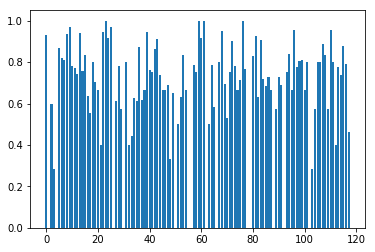

In [8]:
%matplotlib inline

f,a = plt.subplots()

aux = np.array(classes['f1_score'])
aux2 = np.array(classes.index)

a.bar(x=aux2, height=aux)

plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


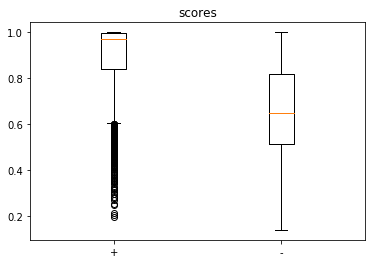

In [9]:
%matplotlib inline
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']]['max']
box_false = data[data['predicted'] != data['real']]['max']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('scores')
    
f.subplots_adjust(hspace=0)
plt.show()


C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


loading 14
loading 15
loading 16
loading 17
loading 18
loading 19
loading 20
loading 21
loading 22
loading 23
loading 24
loading 25
loading 26


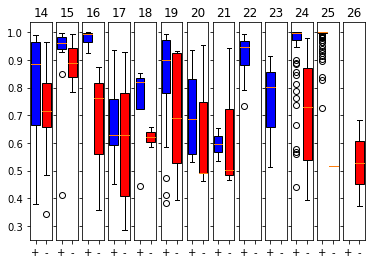

In [10]:
f, a = plt.subplots(1,13, sharex=False, sharey=True)

colors = ['blue', 'red']

for i in range(13):
    j = i+14
    box_true = data[data['predicted'] == j][data['real'] == j]['max']
    box_false = data[data['predicted'] != j][data['real'] == j]['max']
    print("loading", j)
    bplot = a[i].boxplot([box_true, box_false], widths=0.8, labels=['+', '-'],patch_artist=True)
    a[i].set_title(j)

    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        
f.subplots_adjust(hspace=0)
plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


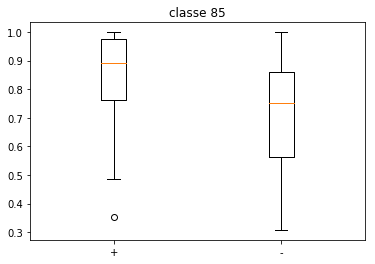

In [11]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']][data['real'] == 85]['max']
box_false = data[data['predicted'] != data['real']][data['real'] == 85]['max']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('classe 85')
    
f.subplots_adjust(hspace=0)
plt.show()


C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


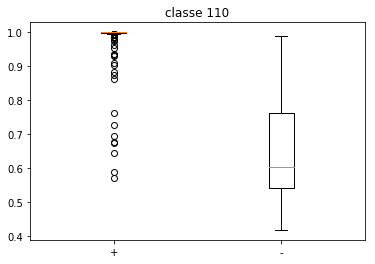

In [12]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']][data['real'] == 110]['max']
box_false = data[data['predicted'] != data['real']][data['real'] == 110]['max']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('classe 110')
    
f.subplots_adjust(hspace=0)
plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


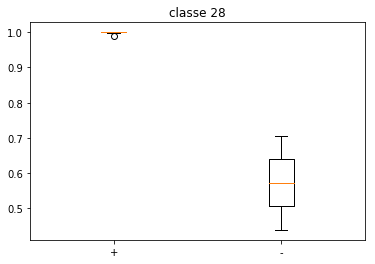

In [13]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']][data['real'] == 28]['max']
box_false = data[data['predicted'] != data['real']][data['real'] == 28]['max']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('classe 28')
    
f.subplots_adjust(hspace=0)
plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


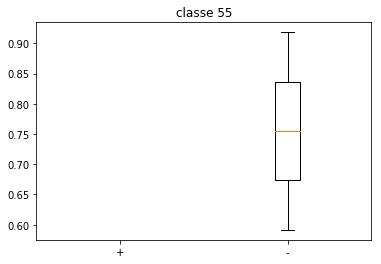

In [14]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']][data['real'] == 55]['max']
box_false = data[data['predicted'] != data['real']][data['real'] == 55]['max']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('classe 55')
    
f.subplots_adjust(hspace=0)
plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


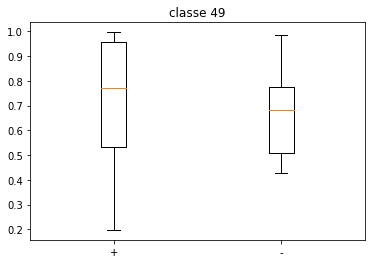

In [15]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']][data['real'] == 49]['max']
box_false = data[data['predicted'] != data['real']][data['real'] == 49]['max']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('classe 49')
    
f.subplots_adjust(hspace=0)
plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


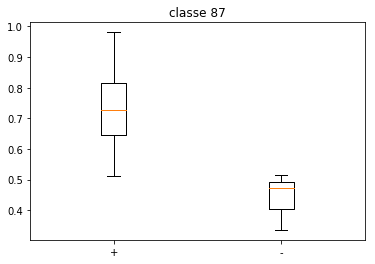

In [16]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']][data['real'] == 87]['max']
box_false = data[data['predicted'] != data['real']][data['real'] == 87]['max']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('classe 87')
    
f.subplots_adjust(hspace=0)
plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


KeyError: 0

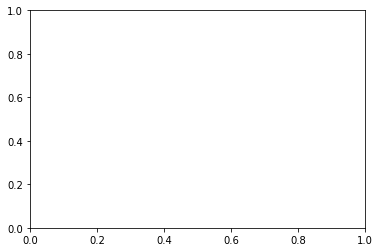

In [19]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']][data['real'] == 63]['max']
box_false = data[data['predicted'] != data['real']][data['real'] == 63]['max']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('classe 63')
    
f.subplots_adjust(hspace=0)
plt.show()

In [8]:
data.head()


,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,max,predicted,real
0,1.677075e-09,4.786375e-11,3.594240e-09,1.679737e-11,5.938936e-09,1.082488e-07,3.083749e-07,2.532832e-07,5.526845e-09,3.223322e-11,...,4.468440e-09,2.263083e-05,2.476573e-02,9.066468e-07,2.463525e-04,1.641271e-04,9.617066e-10,0.925386,97,97
1,1.567184e-14,1.993533e-16,6.275309e-14,3.610380e-12,7.813677e-04,9.430449e-01,5.525546e-02,1.709206e-06,2.341190e-10,2.494470e-14,...,2.225899e-16,4.877699e-10,4.180376e-07,8.919826e-11,8.229092e-11,1.207656e-10,1.040665e-12,0.943045,5,49
2,4.750972e-10,1.840355e-09,5.639497e-14,3.493094e-07,1.201318e-11,1.466741e-13,4.452224e-14,7.385920e-15,4.755611e-15,2.609627e-17,...,9.035506e-10,2.360619e-15,5.075025e-15,1.020768e-17,2.771237e-15,4.714207e-17,1.859444e-13,0.715322,19,14
3,9.335568e-11,1.511868e-10,2.866828e-14,1.837186e-10,5.490438e-24,1.582572e-22,6.966642e-23,1.030901e-20,1.479869e-17,2.848979e-12,...,8.472863e-17,6.407109e-16,6.492397e-20,3.229468e-19,2.050567e-20,2.013915e-20,2.051638e-21,0.999926,110,110
4,4.064904e-03,4.607418e-05,3.466596e-05,1.939644e-03,2.309766e-05,3.624614e-05,1.877559e-04,1.775351e-03,4.982101e-05,3.479077e-04,...,1.337995e-05,1.945454e-04,2.701508e-04,2.434026e-04,5.457456e-05,7.000696e-06,9.895720e-05,0.368563,40,40


In [111]:
def threshold(serie):
    if serie['max'] >= 0.5:
        return serie['max']
    else:
        return 0

data['unknown'] = data.apply(threshold, axis=1)

data.head()


,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,max,predicted,real,unknown
0,1.677075e-09,4.786375e-11,3.594240e-09,1.679737e-11,5.938936e-09,1.082488e-07,3.083749e-07,2.532832e-07,5.526845e-09,3.223322e-11,...,2.263083e-05,2.476573e-02,9.066468e-07,2.463525e-04,1.641271e-04,9.617066e-10,0.925386,97,97,0.925386
1,1.567184e-14,1.993533e-16,6.275309e-14,3.610380e-12,7.813677e-04,9.430449e-01,5.525546e-02,1.709206e-06,2.341190e-10,2.494470e-14,...,4.877699e-10,4.180376e-07,8.919826e-11,8.229092e-11,1.207656e-10,1.040665e-12,0.943045,5,49,0.943045
2,4.750972e-10,1.840355e-09,5.639497e-14,3.493094e-07,1.201318e-11,1.466741e-13,4.452224e-14,7.385920e-15,4.755611e-15,2.609627e-17,...,2.360619e-15,5.075025e-15,1.020768e-17,2.771237e-15,4.714207e-17,1.859444e-13,0.715322,19,14,0.715322
3,9.335568e-11,1.511868e-10,2.866828e-14,1.837186e-10,5.490438e-24,1.582572e-22,6.966642e-23,1.030901e-20,1.479869e-17,2.848979e-12,...,6.407109e-16,6.492397e-20,3.229468e-19,2.050567e-20,2.013915e-20,2.051638e-21,0.999926,110,110,0.999926
4,4.064904e-03,4.607418e-05,3.466596e-05,1.939644e-03,2.309766e-05,3.624614e-05,1.877559e-04,1.775351e-03,4.982101e-05,3.479077e-04,...,1.945454e-04,2.701508e-04,2.434026e-04,5.457456e-05,7.000696e-06,9.895720e-05,0.368563,40,40,0.000000


In [112]:
knowns = data['unknown'].value_counts()


In [113]:
print(len(data[1]))
print(knowns[0])

2942
220


In [114]:
a = (len(data[1])-knowns[0])/len(data[1])
a

0.9252209381373215

In [115]:
knowns_count = len(data[data['unknown'] != 0][data['predicted'] == data['real']])

w_knowns_count = len(data[data['unknown'] != 0][data['predicted'] != data['real']])

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [116]:
acc = knowns_count/(knowns_count + w_knowns_count)
acc

0.8240264511388685